Notebook to implement population model gradient descent to learn parametesr such as p_sympt, p_severe, p_hosp

In [1]:
import datetime
import turicreate as tc
import matplotlib.pyplot as plt
covidestim_csv = 'covidestim.csv'
estimates = tc.SFrame(covidestim_csv)
print(estimates['state'].unique())
state_long = 'New York'
state_short = 'NY' 

%load_ext autoreload
%autoreload 2
from PopulationData_ag import PopulationData
from HospitalData_v20210203 import HospitalData
# import random
import autograd

training_mid_dates = [20200901,  20201120] # start mid end, where forecasting happens from mid to end
# training_mid_dates = [20201010,  20201120] # start mid end, where forecasting happens from mid to end
forecast_duration = 80
training_end_dates = [int((datetime.datetime.strptime(str(d),'%Y%m%d') 
                       + datetime.timedelta(days = forecast_duration)).strftime('%Y%m%d')) for d in training_mid_dates]


# print(training_end_dates)
def make_forecastable_csv(date):
    pd_dummy = PopulationData(covidestim_csv, state_long,'20200711', date, forecast=False);
    pd_dummy.filtered_data.save(state_short+ '_forecast_after_' + str(date) + '.csv', format='csv') 

hd_truthful = HospitalData('CT_HHS_data.csv', state_short,'20200711','20210305')
pd_truthful = PopulationData(covidestim_csv, state_long,'20200711', '20210305', forecast=False);
# pd_truthful.filtered_data['date'].unique().sort()[-10:-1]

for d in training_mid_dates:
    make_forecastable_csv(d)

pd_list = []
for i,(m,e) in enumerate(zip(training_mid_dates,training_end_dates)):
    pd_list += [PopulationData(state_short+ '_forecast_after_'+str(m) + '.csv',state_long,'20200711',str(e), training_mode=True, debug_mode=True)]



pd_list_train = pd_list[0:-1]
pd_list_val = pd_list[-1:]

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.333953 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.435709 secs.

['Missouri', 'District of Columbia', 'Oregon', 'New Hampshire', 'Florida', 'Georgia', 'Mississippi', 'Kansas', 'South Dakota', 'Delaware', 'Hawaii', 'Rhode Island', 'Wisconsin', 'Tennessee', 'New Jersey', 'Utah', 'Colorado', 'New Mexico', 'New York', 'Puerto Rico', 'Louisiana', 'Michigan', 'Vermont', 'Arkansas', 'Nebraska', 'Oklahoma', 'West Virginia', 'Maine', 'Alaska', 'Nevada', 'North Carolina', 'California', 'Indiana', 'Ohio', 'Texas', 'Idaho', 'Washington', 'Arizona', 'Minnesota', 'Iowa', 'Illinois', 'Kentucky', 'South Carolina', 'Montana', 'Massachusetts', 'Virginia', 'Pennsylvania', 'Wyoming', 'Connecticut', 'Alabama', 'Maryland', 'North Dakota']


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 100 lines in 0.0998 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,int,int,int,str,int,str,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/CT_HHS_data.csv

Parsing completed. Parsed 21004 lines in 0.060904 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.359909 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.466126 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.434754 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.373996 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.438629 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.528429 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/NY_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.092968 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/NY_forecast_after_20200901.csv

Parsing completed. Parsed 53 lines in 0.014854 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.305765 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.330828 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/NY_forecast_after_20201120.csv

Parsing completed. Parsed 100 lines in 0.049112 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,int,float,str,str,float,str,str,float,float,str,str,float,str,str,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,str,str,float,float,str,str,str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/NY_forecast_after_20201120.csv

Parsing completed. Parsed 133 lines in 0.017509 secs.

Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 100 lines in 0.378098 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/cuongnguyen/Desktop/cn_autograd_debugging/covidestim.csv

Parsing completed. Parsed 22020 lines in 0.432224 secs.

In [2]:
hd_truthful.filtered_data

previous_day_admission_adult_covid_confirmed ...,total_adult_patients_hospitalized_confirmed_covid ...,staffed_icu_adult_patients_confirmed_covid ...,previous_day_admission_adult_covid_confirmed_c ...,total_adult_patients_hospitalized_confirmed_co ...
0,0,0,1,1
0,2,0,1,1
0,3,0,1,1
0,2,0,1,1
54,583,143,74,78
59,600,147,80,91
65,602,147,83,96
54,565,125,84,98
24,585,126,85,100
42,662,135,87,102


1541.9034114368537 loss at iteration  0 *** gradients_cummsum =  0.002302476213788046


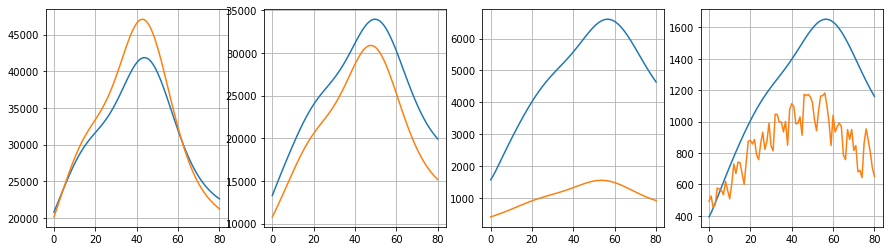

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218} 

1509.9201823014769 loss at iteration  1 *** gradients_cummsum =  0.0022307141188096266
1480.0250027500122 loss at iteration  2 *** gradients_cummsum =  0.0021615434881803704
1452.07307854091 loss at iteration  3 *** gradients_cummsum =  0.0020948520622319855
1425.9304984592063 loss at iteration  4 *** gradients_cummsum =  0.002030533952640291
1401.4733227957386 loss at iteration  5 *** gradients_cummsum =  0.001968489157059012


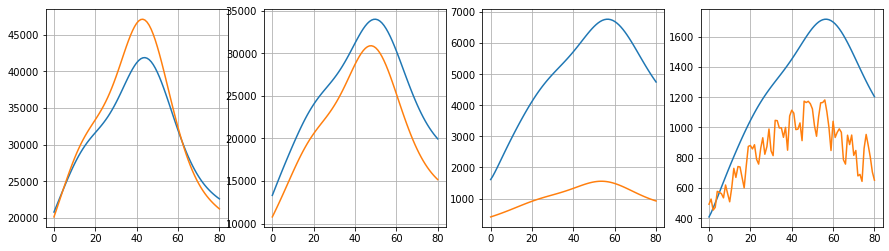

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8211125695454555, 'prob_severe': 0.2044900902041947, 'prob_hosp': 0.25360363406758424, 'prob_soujourn_inf_alpha': 3.409934566892307, 'prob_soujourn_inf_beta': 0.6053501218448971, 'prob_soujourn_symp_alpha': 1.6198368334357858, 'prob_soujourn_symp_beta': 0.21903510450161118} 

1378.5867588822357 loss at iteration  6 *** gradients_cummsum =  0.0019086231209282985
1357.164414105454 loss at iteration  7 *** gradients_cummsum =  0.001850846341021414
1337.1076180312587 loss at iteration  8 *** gradients_cummsum =  0.0017950740059169744
1318.3248063051826 loss at iteration  9 *** gradients_cummsum =  0.001741225669259372
1300.7309598867196 loss at iteration  10 *** gradients_cummsum =  0.0016892249522098802


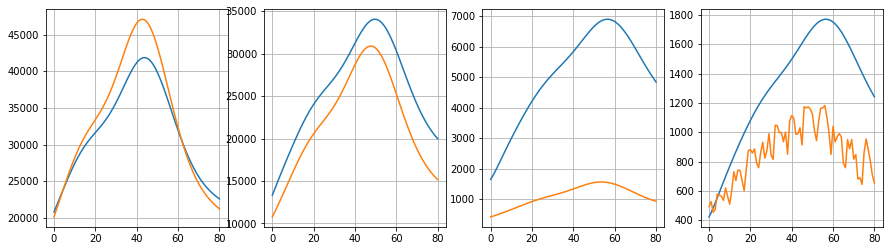

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8220691500881392, 'prob_severe': 0.20826837277562762, 'prob_hosp': 0.25665810491549557, 'prob_soujourn_inf_alpha': 3.409874268842198, 'prob_soujourn_inf_beta': 0.6056726508752733, 'prob_soujourn_symp_alpha': 1.6196874182140577, 'prob_soujourn_symp_beta': 0.21997778653155522} 

1284.2470939428827 loss at iteration  11 *** gradients_cummsum =  0.0016389992719618748
1268.7997913913784 loss at iteration  12 *** gradients_cummsum =  0.0015904795934906077
1254.3207766603339 loss at iteration  13 *** gradients_cummsum =  0.0015436002022216281
1240.7465257332838 loss at iteration  14 *** gradients_cummsum =  0.0014982984953952944
1228.0179089854496 loss at iteration  15 *** gradients_cummsum =  0.0014545147903177798


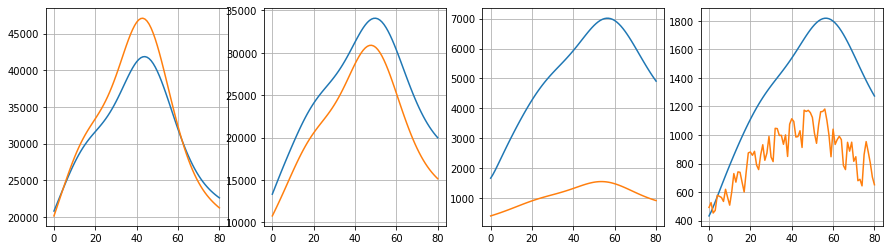

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8228916117481204, 'prob_severe': 0.21145741917529698, 'prob_hosp': 0.25925137826294614, 'prob_soujourn_inf_alpha': 3.409818406053874, 'prob_soujourn_inf_beta': 0.605971361027335, 'prob_soujourn_symp_alpha': 1.6195498237923136, 'prob_soujourn_symp_beta': 0.22084144027760322} 

1216.0798636999143 loss at iteration  16 *** gradients_cummsum =  0.0014121921477913697
1204.8810934874589 loss at iteration  17 *** gradients_cummsum =  0.001371276209294263
1194.3737921281343 loss at iteration  18 *** gradients_cummsum =  0.0013317150465788799
1184.513389611973 loss at iteration  19 *** gradients_cummsum =  0.0012934590225342868
1175.2583183847185 loss at iteration  20 *** gradients_cummsum =  0.0012564606622987075


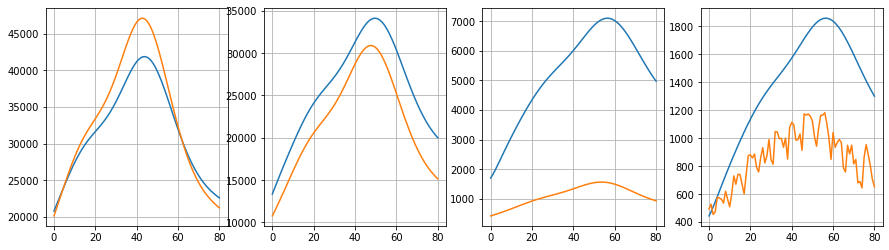

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8235987595460533, 'prob_severe': 0.21415537503708248, 'prob_hosp': 0.26145581335521906, 'prob_soujourn_inf_alpha': 3.409766372587311, 'prob_soujourn_inf_beta': 0.6062495161050104, 'prob_soujourn_symp_alpha': 1.6194223942479127, 'prob_soujourn_symp_beta': 0.22163744065348887} 

1166.5697980066682 loss at iteration  21 *** gradients_cummsum =  0.0012206745336534365
1158.4116366117335 loss at iteration  22 *** gradients_cummsum =  0.0011860571359331936
1150.7500477127257 loss at iteration  23 *** gradients_cummsum =  0.0011525667966544584
1143.5534810401177 loss at iteration  24 *** gradients_cummsum =  0.0011201635752450313
1136.7924662274709 loss at iteration  25 *** gradients_cummsum =  0.0010888091732357125


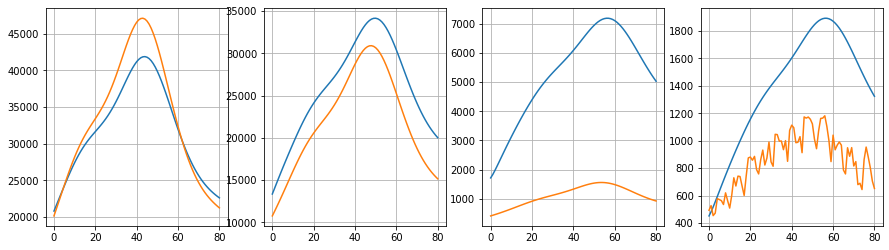

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8242067678609217, 'prob_severe': 0.21644185307779681, 'prob_hosp': 0.2633313904101368, 'prob_soujourn_inf_alpha': 3.4097176441411197, 'prob_soujourn_inf_beta': 0.6065099371316726, 'prob_soujourn_symp_alpha': 1.6193037084619804, 'prob_soujourn_symp_beta': 0.22237546468798686} 

1130.4394682689 loss at iteration  26 *** gradients_cummsum =  0.0010584668504003637
1124.468753774431 loss at iteration  27 *** gradients_cummsum =  0.0010291013463736773
1118.8562671388756 loss at iteration  28 *** gradients_cummsum =  0.0010006788072494648
1113.5795158204912 loss at iteration  29 *** gradients_cummsum =  0.0009731667168327605
1108.6174639980543 loss at iteration  30 *** gradients_cummsum =  0.00094653383213877


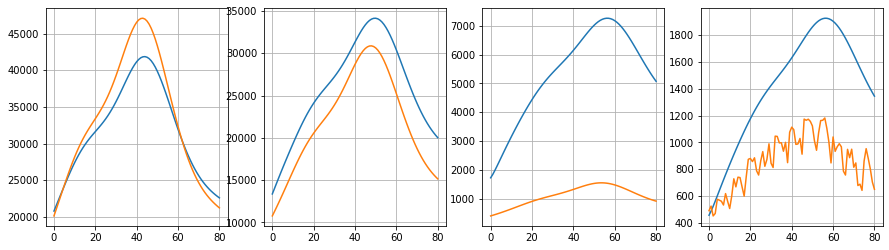

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8247295499068651, 'prob_severe': 0.21838209599496092, 'prob_hosp': 0.2649281343967939, 'prob_soujourn_inf_alpha': 3.4096717673912296, 'prob_soujourn_inf_beta': 0.6067550608957456, 'prob_soujourn_symp_alpha': 1.6191925464593175, 'prob_soujourn_symp_beta': 0.22306375611568857} 

1103.9504339399969 loss at iteration  31 *** gradients_cummsum =  0.0009207501228166216
1099.5600144779319 loss at iteration  32 *** gradients_cummsum =  0.0008957867142313091
1095.4289760298207 loss at iteration  33 *** gradients_cummsum =  0.000871615833882592
1091.5411916655619 loss at iteration  34 *** gradients_cummsum =  0.0008482107609652717
1087.8815637512737 loss at iteration  35 *** gradients_cummsum =  0.0008255457788139604


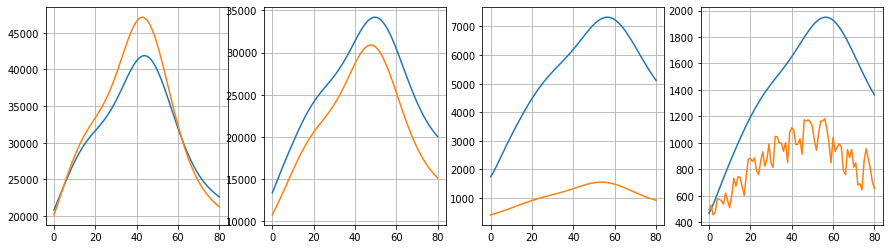

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8251790737569791, 'prob_severe': 0.22003000779202536, 'prob_hosp': 0.2662879744917897, 'prob_soujourn_inf_alpha': 3.4096283506665688, 'prob_soujourn_inf_beta': 0.606986990977037, 'prob_soujourn_symp_alpha': 1.6190878607721524, 'prob_soujourn_symp_beta': 0.22370934514443144} 

1084.435955747364 loss at iteration  36 *** gradients_cummsum =  0.0008035961300292529
1081.1911287710566 loss at iteration  37 *** gradients_cummsum =  0.0007823379741061402
1078.1346825662354 loss at iteration  38 *** gradients_cummsum =  0.0007617483473976035
1075.2550005525572 loss at iteration  39 *** gradients_cummsum =  0.000741805125223899
1072.5411986525166 loss at iteration  40 *** gradients_cummsum =  0.0007224869860254468


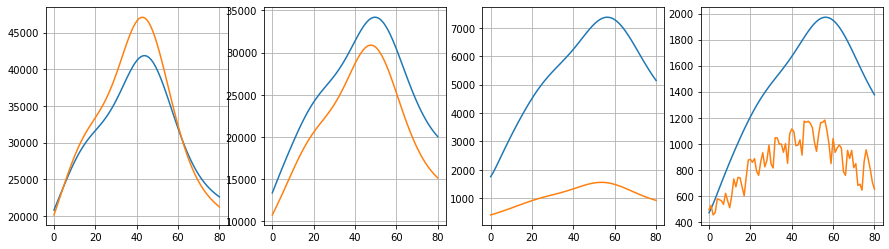

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8255656335524194, 'prob_severe': 0.22143041771348668, 'prob_hosp': 0.2674461961548596, 'prob_soujourn_inf_alpha': 3.4095870557933683, 'prob_soujourn_inf_beta': 0.6072075422424733, 'prob_soujourn_symp_alpha': 1.6189887519819943, 'prob_soujourn_symp_beta': 0.22431823219123614} 

1069.983077619292 loss at iteration  41 *** gradients_cummsum =  0.0007037733773898157
1067.5710786102652 loss at iteration  42 *** gradients_cummsum =  0.0006856444838471569
1065.2962417712135 loss at iteration  43 *** gradients_cummsum =  0.000668081196316935
1063.1501676147102 loss at iteration  44 *** gradients_cummsum =  0.000651065083100123
1061.1249809928465 loss at iteration  45 *** gradients_cummsum =  0.0006345783623219528


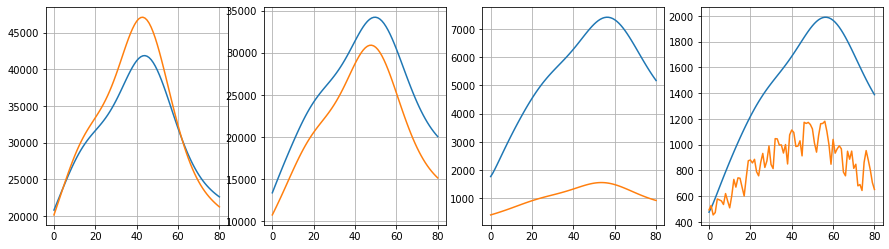

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.825898082695571, 'prob_severe': 0.22262080735784984, 'prob_hosp': 0.268432592020298, 'prob_soujourn_inf_alpha': 3.4095475909685105, 'prob_soujourn_inf_beta': 0.6074182796251415, 'prob_soujourn_symp_alpha': 1.6188944477789626, 'prob_soujourn_symp_beta': 0.2248955422544047} 

1059.2132974800131 loss at iteration  46 *** gradients_cummsum =  0.000618603875727523
1057.408191995401 loss at iteration  47 *** gradients_cummsum =  0.0006031250637659539
1055.7031695078877 loss at iteration  48 *** gradients_cummsum =  0.000588125941861827
1054.0921376777708 loss at iteration  49 *** gradients_cummsum =  0.0005735910778299647
1052.5693813007488 loss at iteration  50 *** gradients_cummsum =  0.0005595055703341853


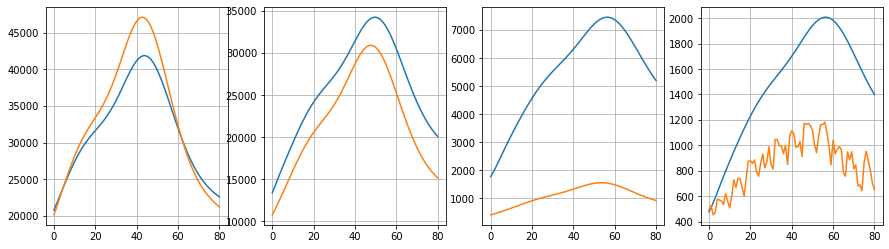

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8261840345635737, 'prob_severe': 0.22363265203960572, 'prob_hosp': 0.2692723854789851, 'prob_soujourn_inf_alpha': 3.4095097045409193, 'prob_soujourn_inf_beta': 0.6076205518848725, 'prob_soujourn_symp_alpha': 1.6188042850056548, 'prob_soujourn_symp_beta': 0.22544565510683634} 

1051.129538429468 loss at iteration  51 *** gradients_cummsum =  0.000545855028367704
1049.7675780572374 loss at iteration  52 *** gradients_cummsum =  0.0005326255516571996
1048.4787792568716 loss at iteration  53 *** gradients_cummsum =  0.0005198037119757231
1047.2587116754937 loss at iteration  54 *** gradients_cummsum =  0.0005073765352869808
1046.1032172932803 loss at iteration  55 *** gradients_cummsum =  0.0004953314846867297


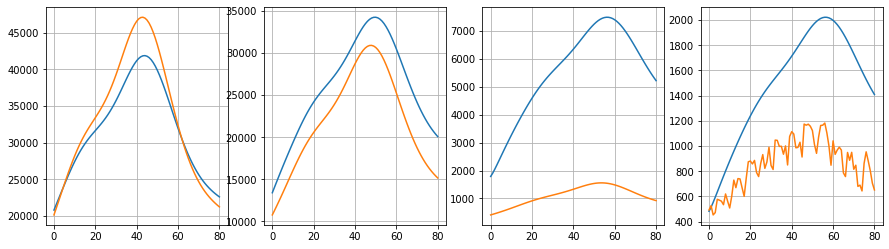

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8264300353536252, 'prob_severe': 0.22449247840957937, 'prob_hosp': 0.26998697961724644, 'prob_soujourn_inf_alpha': 3.409473179593833, 'prob_soujourn_inf_beta': 0.6078155209624831, 'prob_soujourn_symp_alpha': 1.6187176942460966, 'prob_soujourn_symp_beta': 0.22597231542191631} 

1045.0083933607004 loss at iteration  56 *** gradients_cummsum =  0.00048365644409565034
1043.9705764349999 loss at iteration  57 *** gradients_cummsum =  0.00047233970266282463
1042.9863274422225 loss at iteration  58 *** gradients_cummsum =  0.00046136993984621056
1042.0524176963588 loss at iteration  59 *** gradients_cummsum =  0.0004507362111309069
1041.1658158119121 loss at iteration  60 *** gradients_cummsum =  0.0004404279343458915


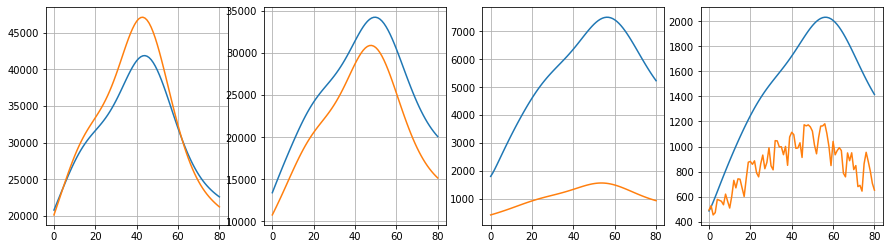

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8266417129574752, 'prob_severe': 0.22522270907504655, 'prob_hosp': 0.2705945698876389, 'prob_soujourn_inf_alpha': 3.409437829232193, 'prob_soujourn_inf_beta': 0.6080041874695074, 'prob_soujourn_symp_alpha': 1.6186341865919793, 'prob_soujourn_symp_beta': 0.22647872614184822} 

1040.3236754507896 loss at iteration  61 *** gradients_cummsum =  0.00043043487657224214
1039.523323848318 loss at iteration  62 *** gradients_cummsum =  0.00042074714157188525
1038.7622510672622 loss at iteration  63 *** gradients_cummsum =  0.0004113551577628276
1038.038099932022 loss at iteration  64 *** gradients_cummsum =  0.00040224966665654976
1037.3486565985932 loss at iteration  65 *** gradients_cummsum =  0.0003934217117924437


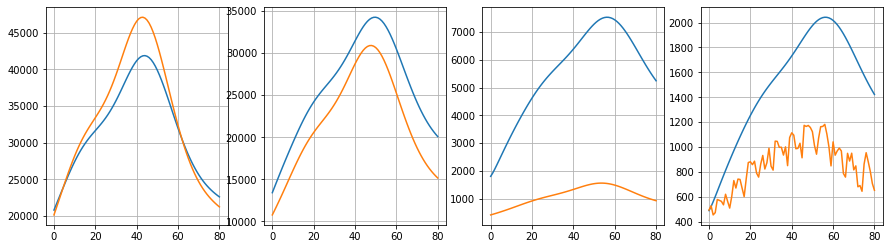

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8268239051892983, 'prob_severe': 0.22584234445640003, 'prob_hosp': 0.2711106490237102, 'prob_soujourn_inf_alpha': 3.409403492489407, 'prob_soujourn_inf_beta': 0.608187412794472, 'prob_soujourn_symp_alpha': 1.6185533422752398, 'prob_soujourn_symp_beta': 0.2269676277850195} 

1036.6918417188792 loss at iteration  66 *** gradients_cummsum =  0.00038486262809864176
1036.0657021607576 loss at iteration  67 *** gradients_cummsum =  0.0003765640316863556
1035.4684032478935 loss at iteration  68 *** gradients_cummsum =  0.0003685178100432331
1034.8982214857467 loss at iteration  69 *** gradients_cummsum =  0.0003607161126209778
1034.3535377425221 loss at iteration  70 *** gradients_cummsum =  0.0003531513417713429


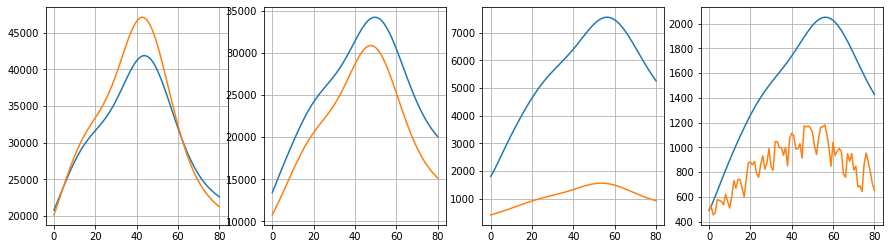

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8269807702180841, 'prob_severe': 0.22636751832246085, 'prob_hosp': 0.2715484257545585, 'prob_soujourn_inf_alpha': 3.409370030776876, 'prob_soujourn_inf_beta': 0.6083659382525939, 'prob_soujourn_symp_alpha': 1.6184748009024623, 'prob_soujourn_symp_beta': 0.22744136591013603} 

1033.83283085575 loss at iteration  71 *** gradients_cummsum =  0.00034581614405977315
1033.3346716372942 loss at iteration  72 *** gradients_cummsum =  0.0003387034018890722
1032.8577172513726 loss at iteration  73 *** gradients_cummsum =  0.0003318062254553767
1032.4007059417315 loss at iteration  74 *** gradients_cummsum =  0.00032511794501055346
1031.9624520858035 loss at iteration  75 *** gradients_cummsum =  0.000318632103405787


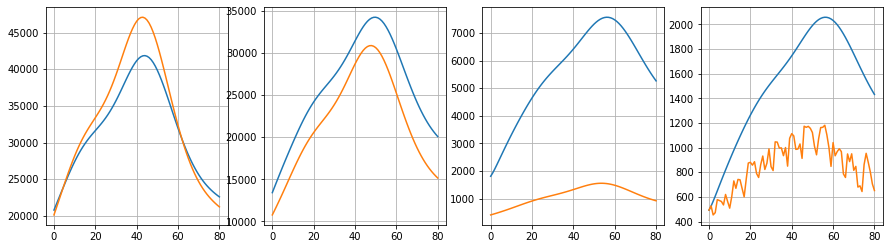

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8271158816580036, 'prob_severe': 0.22681195394915343, 'prob_hosp': 0.2719191738710374, 'prob_soujourn_inf_alpha': 3.409337324808051, 'prob_soujourn_inf_beta': 0.6085404016568853, 'prob_soujourn_symp_alpha': 1.618398253065109, 'prob_soujourn_symp_beta': 0.22790194857476084} 

1031.5418415551787 loss at iteration  76 *** gradients_cummsum =  0.0003123424489241833
1031.1378273628682 loss at iteration  77 *** gradients_cummsum =  0.0003062429283757285
1030.7494255793654 loss at iteration  78 *** gradients_cummsum =  0.0003003276804504248
1030.375711500507 loss at iteration  79 *** gradients_cummsum =  0.0002945910293100605
1030.0158160512842 loss at iteration  80 *** gradients_cummsum =  0.0002890274784219132


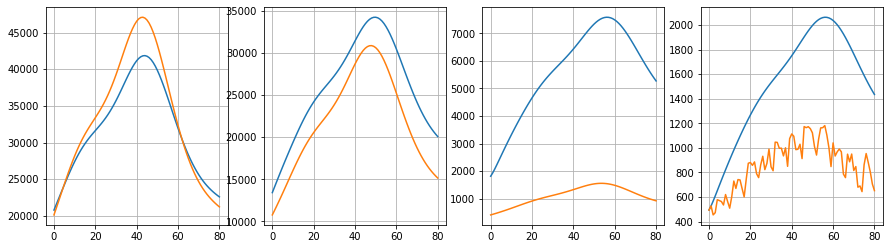

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8272323104318869, 'prob_severe': 0.22718734116879538, 'prob_hosp': 0.27223252453027014, 'prob_soujourn_inf_alpha': 3.40930527193644, 'prob_soujourn_inf_beta': 0.6087113516444097, 'prob_soujourn_symp_alpha': 1.6183234331318725, 'prob_soujourn_symp_beta': 0.22835109532009665} 

1029.6689224108468 loss at iteration  81 *** gradients_cummsum =  0.00028363170460816035
1029.334262844764 loss at iteration  82 *** gradients_cummsum =  0.00027839855231810294
1029.011115731636 loss at iteration  83 *** gradients_cummsum =  0.00027332302810421764
1028.6988027719353 loss at iteration  84 *** gradients_cummsum =  0.00026840029528806556
1028.3966863676123 loss at iteration  85 *** gradients_cummsum =  0.00026362566882990706


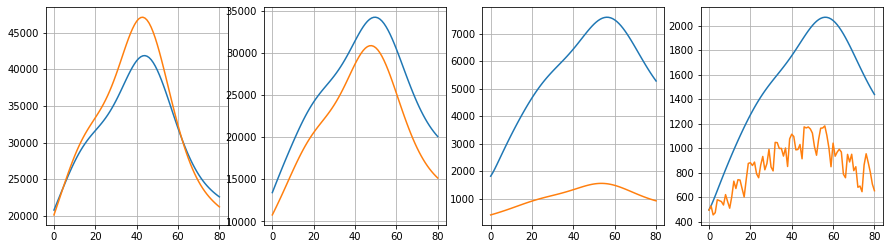

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.827332695232962, 'prob_severe': 0.22750364979154483, 'prob_hosp': 0.2724967119558616, 'prob_soujourn_inf_alpha': 3.4092737838540725, 'prob_soujourn_inf_beta': 0.6088792600514789, 'prob_soujourn_symp_alpha': 1.6182501130570128, 'prob_soujourn_symp_beta': 0.22879027896512513} 

1028.104167162006 loss at iteration  86 *** gradients_cummsum =  0.00025899461036857927
1027.8206817299422 loss at iteration  87 *** gradients_cummsum =  0.0002545027234391624
1027.5457004087868 loss at iteration  88 *** gradients_cummsum =  0.00025014574886499954
1027.2787252617413 loss at iteration  89 *** gradients_cummsum =  0.0002459195602954787
1027.019288165109 loss at iteration  90 *** gradients_cummsum =  0.00024182015991760684


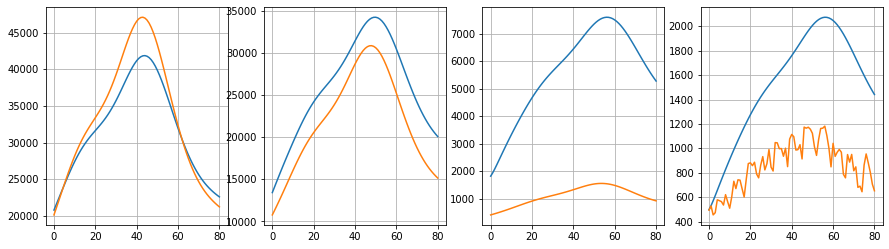

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8274193031603381, 'prob_severe': 0.22776939138984933, 'prob_hosp': 0.2727187806278944, 'prob_soujourn_inf_alpha': 3.4092427846032427, 'prob_soujourn_inf_beta': 0.6090445325956552, 'prob_soujourn_symp_alpha': 1.618178097061895, 'prob_soujourn_symp_beta': 0.22922076128908625} 

1026.7669490119883 loss at iteration  91 *** gradients_cummsum =  0.00023784367430338012
1026.5212940251247 loss at iteration  92 *** gradients_cummsum =  0.00023398635040177557
1026.281934172247 loss at iteration  93 *** gradients_cummsum =  0.00023024455167169655
1026.0485036775622 loss at iteration  94 *** gradients_cummsum =  0.00022661475434641306
1025.8206586235099 loss at iteration  95 *** gradients_cummsum =  0.000223093543825672


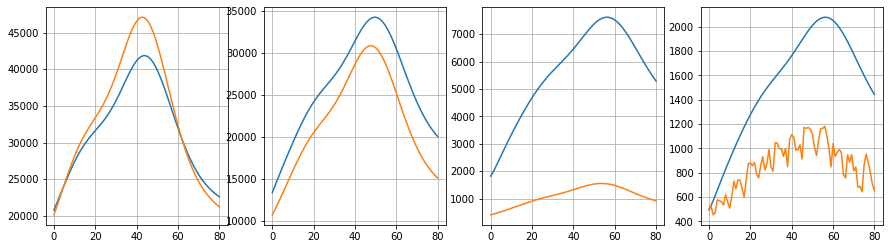

new_params =  {'T_serial': 5.8, 'prob_sympt': 0.8274940818882252, 'prob_severe': 0.2279918388491864, 'prob_hosp': 0.2729047604752695, 'prob_soujourn_inf_alpha': 3.4092122088601493, 'prob_soujourn_inf_beta': 0.6092075180902888, 'prob_soujourn_symp_alpha': 1.6181072170670143, 'prob_soujourn_symp_beta': 0.22964362351251996} 

1025.5980756372276 loss at iteration  96 *** gradients_cummsum =  0.0002196776111850117
1025.3804506565489 loss at iteration  97 *** gradients_cummsum =  0.0002163637498127006
1025.1674977706564 loss at iteration  98 *** gradients_cummsum =  0.00021314885214701243
1024.9589481308224 loss at iteration  99 *** gradients_cummsum =  0.00021002990653971968


In [3]:
def get_truthdict_given_mid_end(mid_date,end_date):
#     print(mid_date,end_date, 'mid date end date')
    pd_truthful.start_date = mid_date
    pd_truthful.end_date = end_date
    hd_truthful.start_date = mid_date
    hd_truthful.end_date = end_date
    truthdict = {
    'date':pd_truthful.filtered_data['date'],
    'infections':pd_truthful.filtered_data['infections'],
    'symptomatic':pd_truthful.filtered_data['symptomatic'],
    'severe':pd_truthful.filtered_data['severe'],
    'hosp':hd_truthful.filtered_data['previous_day_admission_adult_covid_confirmed'],
    }

    return truthdict


def add_to_dict(d,g):
    for k in d.keys():
        d[k]=d[k]+g[k]
    return d

def scale_dict_vals(d,s):
    for k in d.keys():
        d[k] = s*d[k]
    return d

def cumsum_dict_vals(d,s):
    cumsum= 0
    for k in d.keys():
        cumsum+=abs(s*d[k])
    return cumsum

import numpy as np
import numpy.random as random
def gradient_descent(pd_list_train, init_params, n_iters=2, step_size=0.001, n_steps_between_print=5, lambda_reg = 1, epsilon_stop=5e-10):
    batch_loss_per_iteration = []
    val_loss_per_iteration = []
    for n in range(n_iters):
        
        batch_loss = 0
        for pd in pd_list_train:
            pd.loss_per_iteration += [0]
        
        #         pd_batch = random.choice(pd_list_train,replace=False, size=3)
        pd_batch = random.choice(pd_list_train,replace=False, size=1)
        if n == 0:
            new_params = init_params
        else:
            new_params = add_to_dict(new_params, scale_dict_vals(grads, -1*step_size))
        
        
        for i,pd in enumerate(pd_batch):
            pd.training_mode=True
            new_grad = pd.get_grad_of_loss(new_params,get_truthdict_given_mid_end(pd.filtered_data['date'][-1], pd.end_date) ,lambda_reg= lambda_reg)
            batch_loss += pd.loss_per_iteration[-1] # pd.loss_per_iteration[-1] is set to loss within get_grad_of_loss call
            if i == 0:
                grads = new_grad
            else:
                grads = add_to_dict(grads, new_grad)
        
        grads = scale_dict_vals(grads, 1/len(pd_batch))
        batch_loss_per_iteration += [batch_loss/len(pd_batch)]
        print(batch_loss/len(pd_batch), 'loss at iteration ', n, '*** gradients_cummsum = ', cumsum_dict_vals(grads, step_size))
#         print(cumsum_dict_vals(grads,1), 'cumsum for ', grads)
        
#         pd_list_val = pd_batch # DEBUG PURPOSES
        
        val_loss_per_iteration += [np.nan]
        if n%n_steps_between_print == 0:
            val_loss = 0              
            for pd in pd_list_val:
                fig, [ax1, ax2, ax3, ax4] = plt.subplots(nrows=1, ncols=4,figsize=(15,4))    
                pd.training_mode=False
                fc_data = pd.get_forecasted_data(new_params) 
                pd.training_mode=True
                truth_data = get_truthdict_given_mid_end(pd.filtered_data['date'][-1],pd.end_date)
                
                ax1.plot(fc_data['infections'])
                ax2.plot(fc_data['symptomatic'])
                ax3.plot(fc_data['severe'])
                ax4.plot(fc_data['hosp'])

                ax1.plot(truth_data['infections'])
                ax2.plot(truth_data['symptomatic'])
                ax3.plot(truth_data['severe'])
                ax4.plot(truth_data['hosp'])
                for i in range(1,5,1):
                    eval('ax' + str(i) + '.grid()') 
                plt.show()
                print('new_params = ',new_params,'\n')
                loss = 0
                for i,k in enumerate(['symptomatic', 'severe','hosp']):
                    val_loss+=np.sum(np.abs(np.array(fc_data[k]) - np.array(truth_data[k]))*np.linspace(0.1, 1, num=len(fc_data[k])) )*(i+1)
            val_loss_per_iteration[-1] = val_loss/len(pd_list_val)
        
        if cumsum_dict_vals(grads, step_size)<epsilon_stop:
            return new_params, batch_loss_per_iteration, val_loss_per_iteration
    return new_params, batch_loss_per_iteration, val_loss_per_iteration

train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
new_params, batch_loss_per_iteration, val_loss_per_iteration = gradient_descent(
    pd_list_train, train_params, n_iters=100, step_size=5e-8, n_steps_between_print=5, lambda_reg=1,epsilon_stop=1e-4)



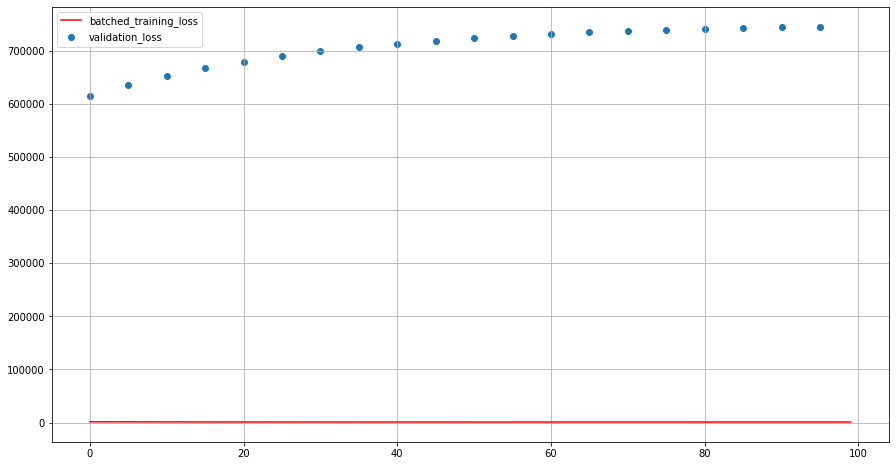

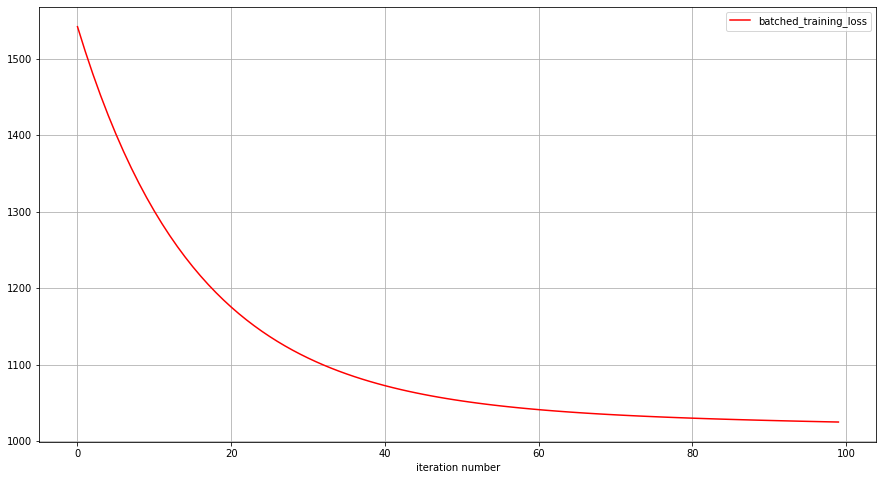

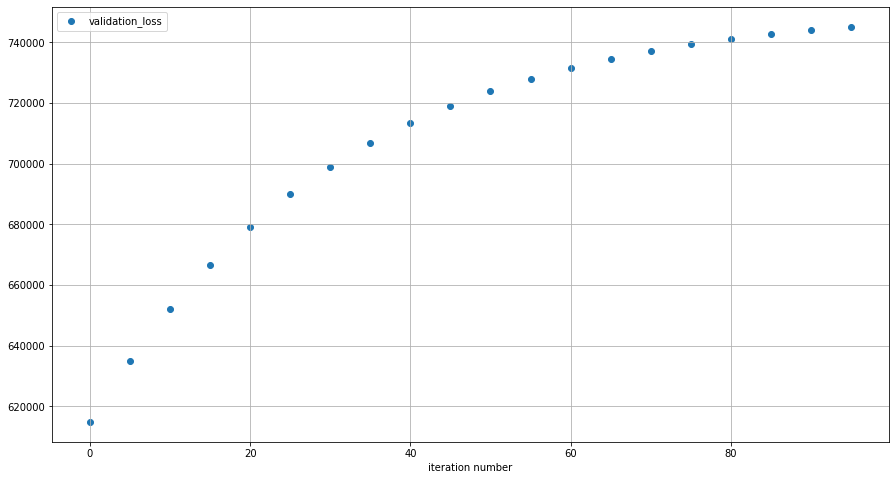

In [4]:
fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
# plt.show()

plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(15,8))
plt.plot(batch_loss_per_iteration,color='r', label='batched_training_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

fig = plt.figure(figsize=(15,8))
plt.scatter(list(range(len(val_loss_per_iteration))),val_loss_per_iteration,label='validation_loss')
plt.legend()
plt.grid()
plt.xlabel('iteration number')
plt.show()

# print(val_loss_per_iteration)
# import numpy as np
# np.linspace(1, 10, num=10) * np.array(np.linspace(0.1, 1, num=10))


{'T_serial': 5.8, 'prob_sympt': 0.82, 'prob_severe': 0.2, 'prob_hosp': 0.25, 'prob_soujourn_inf_alpha': 3.41, 'prob_soujourn_inf_beta': 0.605, 'prob_soujourn_symp_alpha': 1.62, 'prob_soujourn_symp_beta': 0.218}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-a4364d8650fc>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


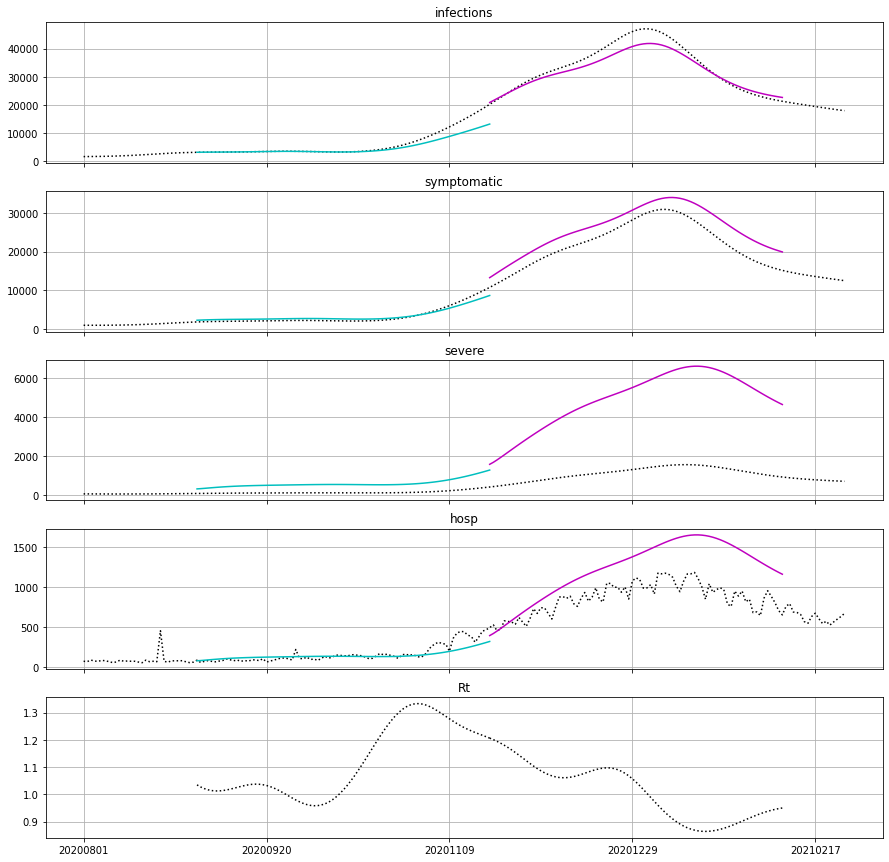

{'T_serial': 5.8, 'prob_sympt': 0.8275465203979091, 'prob_severe': 0.2281428354852281, 'prob_hosp': 0.2730310562905009, 'prob_soujourn_inf_alpha': 3.409188015170595, 'prob_soujourn_inf_beta': 0.6093364627769386, 'prob_soujourn_symp_alpha': 1.6180512333091055, 'prob_soujourn_symp_beta': 0.22997705417442033}
20200801  to  20210225
cyan = forecasts after being trained on that interval
violet = forecasts on validation/unseen interval


<ipython-input-5-a4364d8650fc>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['']+ date_labels)


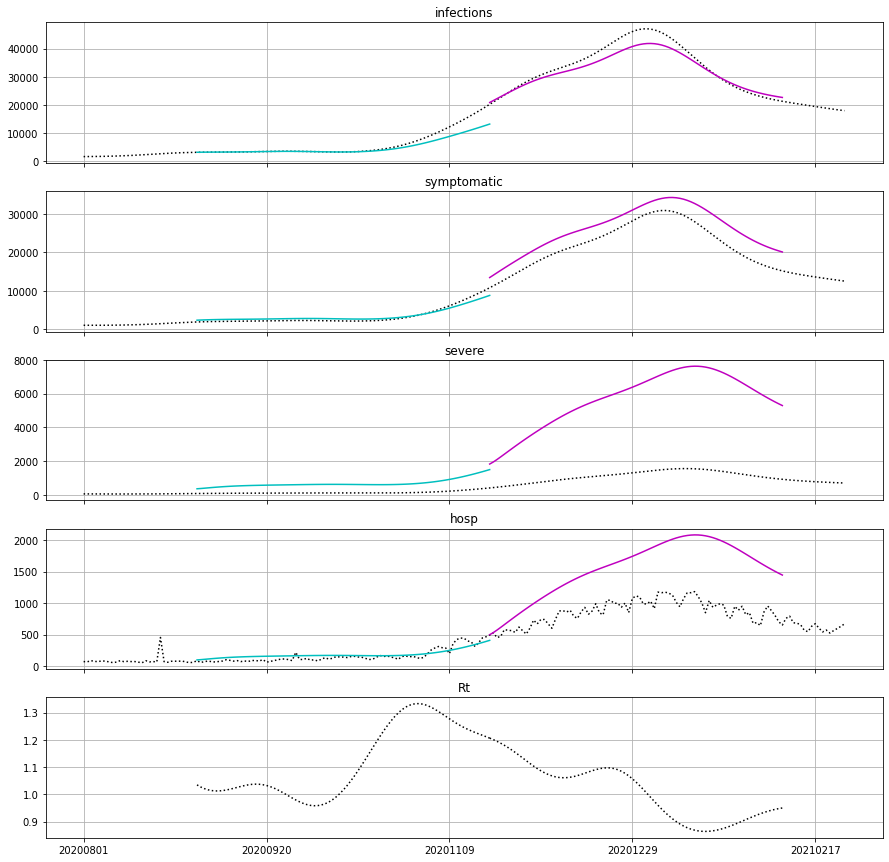

In [5]:
def plot_performance(new_params):
    color_list = ['k','k','k','k','k']
    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=5, ncols=1,figsize=(15,15), sharex=True)   
    truth_data = get_truthdict_given_mid_end('20200801', '20210225')
    print(pd_truthful.start_date, ' to ', pd_truthful.end_date)
    print('cyan = forecasts after being trained on that interval')
    print('violet = forecasts on validation/unseen interval')


    for i,(p,c) in enumerate(zip(['infections', 'symptomatic', 'severe','hosp','Rt'],color_list)):
        if p != 'Rt':
            eval('ax'+str(i+1) + ".plot( truth_data[p], color = c,ls=':' )")
        for pd in pd_list_train:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'c',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")
        for pd in pd_list_val:
            pd.training_mode = False
            fc_data = pd.get_forecasted_data(new_params) 
    #         '-', '--', '-.', ':',
            start_idx = list(truth_data['date']).index(int(fc_data['date'][0]))
            end_idx = list(truth_data['date']).index(int(fc_data['date'][-1]))
            if p != 'Rt':
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'm',ls = '-' )")
            else:
                eval('ax'+str(i+1) + ".plot( list(range(start_idx,end_idx+1)),fc_data[p], color = 'k',ls = ':' )")

        eval('ax'+str(i+1) + '.set_title(p)')
        eval('ax'+str(i+1) + '.grid()')
    # current_labels = ax4.get_xticklabels()

    #     eval('ax'+str(i+1) + ".set_xticklabels( [str(d) for d in list(truth_data['date']) ] )" )
    current_labels = ax4.get_xticks();
    date_labels = [truth_data['date'][int(jj)] for jj in list(current_labels[1:-1]) ]

    ax4.set_xticklabels(['']+ date_labels)

# train_params = {'T_serial':5.8,'prob_sympt':0.536,'prob_severe':0.1,'prob_hosp':0.55,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
train_params = {'T_serial':5.8,'prob_sympt':0.82,'prob_severe':0.2,'prob_hosp':0.25,'prob_soujourn_inf_alpha':3.41, 'prob_soujourn_inf_beta':0.605,'prob_soujourn_symp_alpha':1.62, 'prob_soujourn_symp_beta':0.218}
print(train_params)
plot_performance(train_params)
plt.show()

print(new_params)
plot_performance(new_params)


In [6]:
import pickle


filename = state_short + '_population_params'
with open(filename+'.pickle', 'wb') as handle:
    pickle.dump(new_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(filename+'.pickle', 'rb') as handle:
    b = pickle.load(handle)

print (new_params == b)
print(new_params)

True
{'T_serial': 5.8, 'prob_sympt': 0.8275465203979091, 'prob_severe': 0.2281428354852281, 'prob_hosp': 0.2730310562905009, 'prob_soujourn_inf_alpha': 3.409188015170595, 'prob_soujourn_inf_beta': 0.6093364627769386, 'prob_soujourn_symp_alpha': 1.6180512333091055, 'prob_soujourn_symp_beta': 0.22997705417442033}


In [7]:
[m for (m,n) in zip([1,2],[3,4])]

[1, 2]